In [1]:
import pandas as pd
from darts import TimeSeries

df = pd.read_csv('datasets_1057_1913_AirPassengers.csv')

series = TimeSeries.from_dataframe(df,'Month','#Passengers')

In [4]:
import warnings
warnings.filterwarnings("ignore")

from darts.models import ExponentialSmoothing

train,val = series.split_before(pd.Timestamp('19580101'))

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

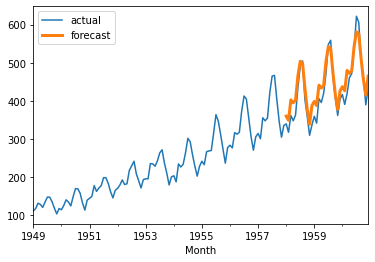

In [5]:
import matplotlib.pyplot as plt

series.plot(label='actual')
prediction.plot(label='forecast',lw=3)
plt.legend()

# Backtesting

In [7]:
from darts.backtesting import backtest_forecasting
from darts.models import Prophet

models = [ExponentialSmoothing(),Prophet()]

backtests = [backtest_forecasting(series,
                                 model,
                                 pd.Timestamp('19550101'),
                                 fcast_horizon_n=3)
            for model in models]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

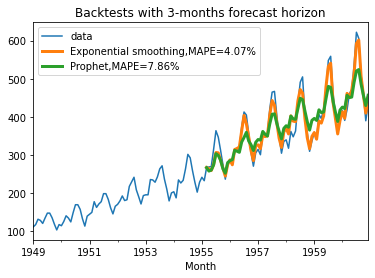

In [9]:
from darts.metrics import mape

series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i],series)
    backtests[i].plot(lw=3,label='{},MAPE={:.2f}%'.format(m,err))
    
plt.title('Backtests with 3-months forecast horizon')
plt.legend()